In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import csv

def draw_graph(filepath):
    '''
    画网络图
    '''
    df_data = pd.read_csv(filepath)
    np_data = np.array(df_data)
    list_data = np_data.tolist()  #转成列表
    G = nx.Graph() #创建空图
    for i in list_data:
        G.add_edge(i[0],i[1],weight=float(i[2])) #添加边的关系
    return G

filepath = '/Users/yingchen/Documents2/CASA/urban_simulation/practical/wk7/Week_7_final/london_network.csv'
G = draw_graph(filepath)
e = nx.global_efficiency(G)
n = len(G.nodes())
DC = nx.degree_centrality(G)
BC = nx.betweenness_centrality(G)
CC = nx.closeness_centrality(G)

DC_sort = sorted(DC.items(), key=lambda x:-x[-1])
BC_sort = sorted(BC.items(), key=lambda x:-x[-1])
CC_sort = sorted(CC.items(), key=lambda x:-x[-1])


def remove_node(G,dicts):
    nodes = [k for k,v in dicts]
    n = len(nodes)
    res1 = [] # 连通子图
    res2 = [] # 网络效率
    res3 = []
    res1.append(1)
    res3.append(0)
    label = 0
    res2.append(nx.global_efficiency(G))
    while label < n:
        G.remove_node(nodes[label])
        label += 1
        nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
        if len(nums):
            res1.append(nums[0]/n)
        else:
            res1.append(0)
        res2.append(nx.global_efficiency(G))
        res3.append((label+1)/n)

    return res1,res2,res3
     

def show_connect_nonsq(x,DC_A,CC_A,BC_A):
    plt.plot(x,DC_A,color='g',label='DC_non-seq',linestyle='--')
    plt.plot(x,BC_A,color='r',label='BC_non-seq',linestyle='--')
    plt.plot(x,CC_A,color='b',label='CC_non-seq',linestyle='--')

    plt.legend()

    plt.xlabel('Nodes Removal by %')
    plt.ylabel('Maximum Connectivity Coefficient')
    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('p1_LCC_nonsq.png', dpi=100)

def show_connect_sq(x,DC_I,CC_I,BC_I):

    plt.plot(x,DC_I,color='g',label='DC_seq')
    plt.plot(x,BC_I,color='r',label='BC_seq')
    plt.plot(x,CC_I,color='b',label='CC_seq')

    plt.legend()

    plt.xlabel('Nodes Removal by %')
    plt.ylabel('Maximum Connectivity Coefficient')
    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('p1_LCC_sq.png', dpi=100)
    
    
def show_eff_nonsq(x,DC_A,CC_A,BC_A):

    plt.plot(x,DC_A,color='g',label='DC_non-seq',linestyle='--')
    plt.plot(x,BC_A,color='r',label='BC_non-seq',linestyle='--')
    plt.plot(x,CC_A,color='b',label='CC_non-seq',linestyle='--')

    plt.legend()

    plt.xlabel('Nodes Removal by %')
    plt.ylabel('Network Global Efficiency')
    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('p1_EFF_nonsq.png', dpi=100)
    
def show_eff_sq(x,DC_I,CC_I,BC_I):

    plt.plot(x,DC_I,color='g',label='DC_seq')
    plt.plot(x,BC_I,color='r',label='BC_seq')
    plt.plot(x,CC_I,color='b',label='CC_seq')

    plt.legend()

    plt.xlabel('Nodes Removal by %')
    plt.ylabel('Network Global Efficiency')
    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('p1_EFF_sq.png', dpi=100)

DCres1,DCres2,DCres3 = remove_node(G,DC_sort)
print('DC')
G = draw_graph(filepath)
BCres1,BCres2,BCres3 = remove_node(G,BC_sort)
print('BC')
G = draw_graph(filepath)
CCres1,CCres2,CCres3 = remove_node(G,CC_sort)
print('CC')

G = draw_graph(filepath)
count = 0
resCC = []
resCC_eff = []
resCC_eff.append(e)
resCC.append(1)
while count < n:
    CC = nx.closeness_centrality(G)
    CC_sort = sorted(CC.items(),key=lambda x:-x[-1])
    G.remove_node(CC_sort[0][0])
    resCC_eff.append(nx.global_efficiency(G))
    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(nums):
        resCC.append(nums[0]/n)
    else:
        resCC.append(0)
    count += 1
print('CC')

G = draw_graph(filepath)
count = 0
resBC = []
resBC_eff = []
resBC_eff.append(e)
resBC.append(1)
while count < n:
    BC = nx.betweenness_centrality(G)
    BC_sort = sorted(BC.items(),key=lambda x:-x[-1])
    G.remove_node(BC_sort[0][0])
    resBC_eff.append(nx.global_efficiency(G))
    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(nums):
        resBC.append(nums[0]/n)
    else:
        resBC.append(0)
    count += 1
print('BC')

G = draw_graph(filepath)
count = 0
resDC = []
resDC_eff = []
resDC_eff.append(e)
resDC.append(1)
while count < n:
    DC = nx.degree_centrality(G)
    DC_sort = sorted(DC.items(),key=lambda x:-x[-1])

    G.remove_node(DC_sort[0][0])
    resDC_eff.append(nx.global_efficiency(G))
    nums = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(nums):
        resDC.append(nums[0]/n)
    else:
        resDC.append(0)
    count += 1
print('DC')

DC
BC
CC
CC
BC
DC


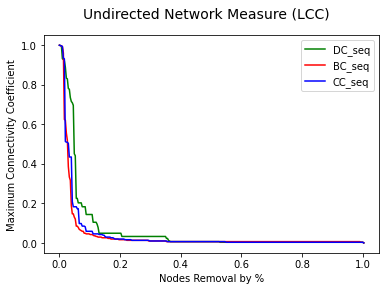

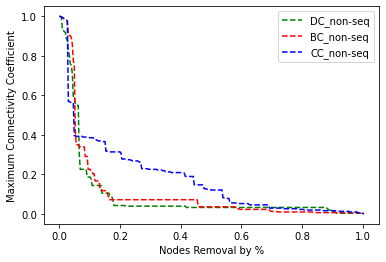

<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.figure()
fig.suptitle('Undirected Network Measure (LCC)', fontsize=14)
show_connect_sq(CCres3,resDC,resCC,resBC)
show_connect_nonsq(CCres3,DCres1,CCres1,BCres1)

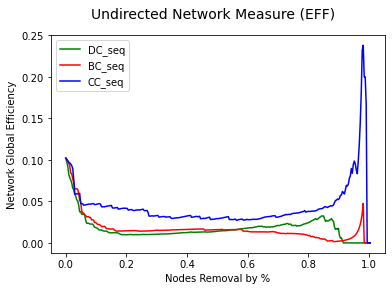

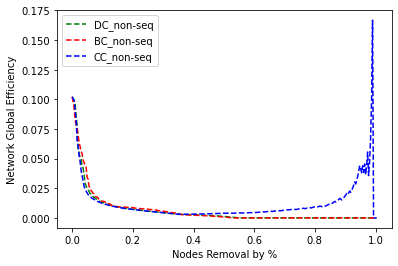

<Figure size 432x288 with 0 Axes>

In [21]:
fig = plt.figure()
fig.suptitle('Undirected Network Measure (EFF)', fontsize=14)
show_eff_sq(DCres3,DCres2,CCres2,BCres2)
show_eff_nonsq(DCres3,resCC_eff,resBC_eff,resDC_eff)